# Lesson 7 - Session 3 - Example 3

Classification example using Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [52]:
# %pip install graphviz
# %pip install pydotplus
# %pip install dtreeviz

In [53]:
# load data
import pandas as pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

pd.DataFrame(dataset.data, columns=dataset.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [54]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# decision tree model
from sklearn.tree import DecisionTreeClassifier

# clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test) 

In [56]:
# export decision tree as text
from sklearn.tree import export_text

text_representation = export_text(clf)
print(text_representation)

|--- feature_7 <= 0.05
|   |--- feature_20 <= 16.83
|   |   |--- feature_13 <= 48.70
|   |   |   |--- class: 1
|   |   |--- feature_13 >  48.70
|   |   |   |--- class: 0
|   |--- feature_20 >  16.83
|   |   |--- feature_21 <= 19.91
|   |   |   |--- class: 1
|   |   |--- feature_21 >  19.91
|   |   |   |--- class: 0
|--- feature_7 >  0.05
|   |--- feature_22 <= 114.45
|   |   |--- feature_21 <= 25.65
|   |   |   |--- class: 1
|   |   |--- feature_21 >  25.65
|   |   |   |--- class: 0
|   |--- feature_22 >  114.45
|   |   |--- class: 0



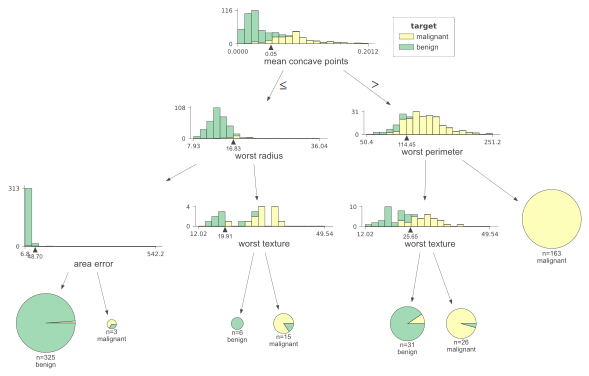

In [57]:
# visualize decision tree (using dtreeviz)
from dtreeviz.trees import dtreeviz 
from sklearn.datasets import load_breast_cancer

viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=dataset.feature_names,
                class_names=list(dataset.target_names)
                )

viz

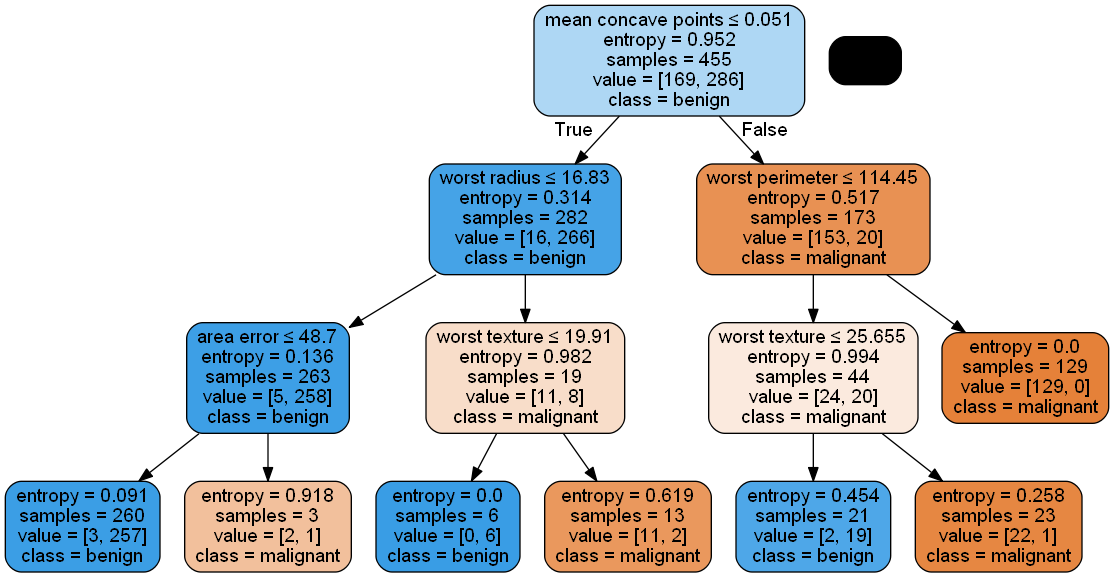

In [58]:
# visualize decision tree (using graphviz)
import pydotplus

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = dataset.feature_names,
                class_names=list(dataset.target_names))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

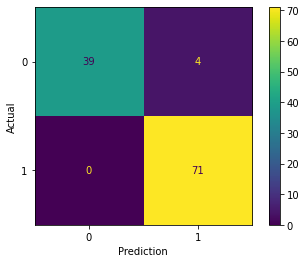

In [59]:
# Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [60]:
# metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, precision_score,
                             recall_score, classification_report)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(f'{accuracy=:.4%}')
print(f'{precision=:.4%}')
print(f'{recall=:.4%}')
print(f'{f1_score=:.4%}')
print(classification_report(y_test, y_pred, target_names=dataset.target_names))

[[39  4]
 [ 0 71]]
accuracy=96.4912%
precision=94.6667%
recall=100.0000%
f1_score=97.2603%
              precision    recall  f1-score   support

   malignant       1.00      0.91      0.95        43
      benign       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



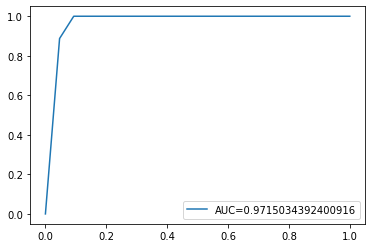

In [61]:
# ROC & AUC
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label=f"AUC={auc}")
plt.legend()
plt.show()